<a href="https://colab.research.google.com/github/Wilson1061/ProyectoArduino_BT/blob/main/Copia_de_Enfa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos (las etiquetas de los nodos son números del 0 al 13)
nodes = list(range(14))
G.add_nodes_from(nodes)

# Añadir aristas (conexiones) según la imagen proporcionada
edges = [
    (0, 1, 10), (0, 7, 2800), (0, 2, 1600),
    (1, 2, 10), (1, 3, 1000),
    (2, 5, 2000),
    (3, 4, 600), (3, 10, 2400),
    (4, 6, 800), (4, 5, 1100),
    (5, 13, 2000), (5, 9, 1200),
    (6, 7, 700),
    (7, 8, 700),
    (8, 11, 500), (8, 9, 900), (8, 12, 500),
    (10, 11, 800), (10, 12, 800),
    (11, 13, 300),
    (12, 13, 300)
]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

In [ ]:
# Posiciones específicas de los nodos para que se asemejen al mapa de EE.UU.
pos = {
    0: (-1.6, 0.6),   # Seattle / #12
    1: (-1.6, -0.3), # PaloAlto / San Francisco #1
    2: (-1.2, -1), # SanDiego / Los Angeles #2
    3: (-1, -0.1),   # LakeCity #13
    4: (-0.5, -0.4), # Boulder /Denver #3
    5: (-0.5, -1.3), # Houston #5
    6: (0, -0.3),    # Lincon
    7: (0.5, -0.1), #  Champaign
    8: (1, 0.5),  # Pilsburgh
    9: (1, -1.1), # Atlanta #8
    10: (0.3, 0.8), # AnnArbor /Minneapolis #6
    11: (1.5, 1), # Ithaca
    12: (1.3, 0), # Princeton /New Jersey #10
    13: (1.5, -0.5) # CollegePK /Washington D.C. #9
}

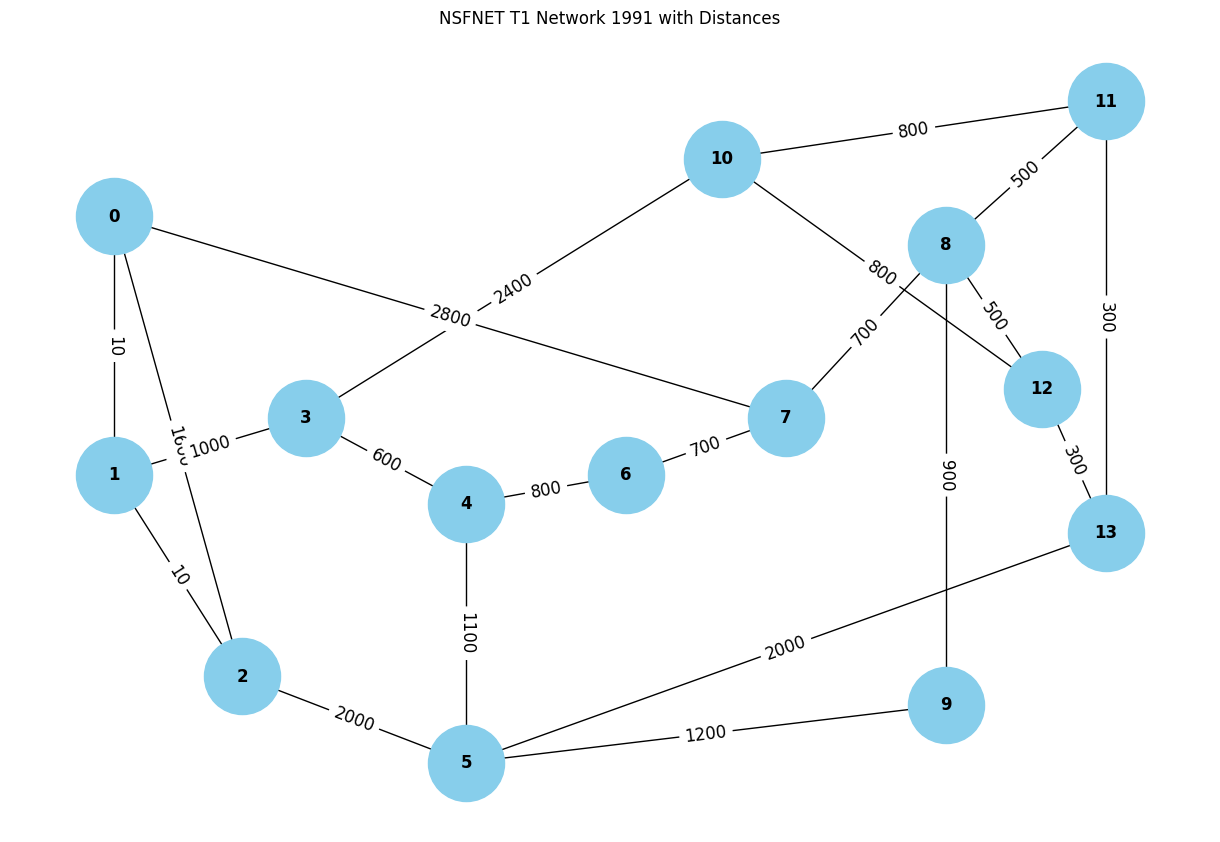

In [ ]:
# Dibujar el grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", edge_color="black")

# Dibujar las etiquetas de las aristas (distancias)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("NSFNET T1 Network 1991 with Distances")
plt.show()

In [ ]:
print("Algoritmo Dijkstra")
source_node = 0
distances, paths = nx.single_source_dijkstra(G, source=source_node)

print(f"Distancias desde el nodo {source_node}:")
for target_node in distances:
    print(f"Distancia al nodo {target_node}: {distances[target_node]}")
    print(f"Camino: {paths[target_node]}")

Algoritmo Dijkstra
Distancias desde el nodo 0:
Distancia al nodo 0: 0
Camino: [0]
Distancia al nodo 1: 1100
Camino: [0, 1]
Distancia al nodo 2: 1600
Camino: [0, 2]
Distancia al nodo 3: 2100
Camino: [0, 1, 3]
Distancia al nodo 4: 2700
Camino: [0, 1, 3, 4]
Distancia al nodo 7: 2800
Camino: [0, 7]
Distancia al nodo 6: 3500
Camino: [0, 1, 3, 4, 6]
Distancia al nodo 8: 3500
Camino: [0, 7, 8]
Distancia al nodo 5: 3600
Camino: [0, 2, 5]
Distancia al nodo 11: 4000
Camino: [0, 7, 8, 11]
Distancia al nodo 12: 4000
Camino: [0, 7, 8, 12]
Distancia al nodo 13: 4300
Camino: [0, 7, 8, 11, 13]
Distancia al nodo 9: 4400
Camino: [0, 7, 8, 9]
Distancia al nodo 10: 4500
Camino: [0, 1, 3, 10]


In [ ]:
# Algoritmo de Bellman-Ford para encontrar el camino más corto desde el nodo 0
source_node = 0

# Inicializar distancias y predecesores
distances = {node: float('inf') for node in G.nodes}
predecessors = {node: None for node in G.nodes}
distances[source_node] = 0

# Relajar las aristas repetidamente
for _ in range(len(G.nodes) - 1):
    for u, v, data in G.edges(data=True):
        weight = data['weight']
        if distances[u] + weight < distances[v]:
            distances[v] = distances[u] + weight
            predecessors[v] = u
        if distances[v] + weight < distances[u]:
            distances[u] = distances[v] + weight
            predecessors[u] = v

# Comprobar ciclos de peso negativo
for u, v, data in G.edges(data=True):
    weight = data['weight']
    if distances[u] + weight < distances[v]:
        print("El grafo contiene un ciclo de peso negativo")
        break

# Imprimir las distancias y caminos
print(f"Distancias desde el nodo {source_node}:")
for target_node in distances:
    path = []
    current_node = target_node
    while current_node is not None:
        path.insert(0, current_node)
        current_node = predecessors[current_node]
    print(f"Distancia al nodo {target_node}: {distances[target_node]}")
    print(f"Camino: {path}")

Distancias desde el nodo 0:
Distancia al nodo 0: 0
Camino: [0]
Distancia al nodo 1: 1100
Camino: [0, 1]
Distancia al nodo 2: 1600
Camino: [0, 2]
Distancia al nodo 3: 2100
Camino: [0, 1, 3]
Distancia al nodo 4: 2700
Camino: [0, 1, 3, 4]
Distancia al nodo 5: 3600
Camino: [0, 2, 5]
Distancia al nodo 6: 3500
Camino: [0, 1, 3, 4, 6]
Distancia al nodo 7: 2800
Camino: [0, 7]
Distancia al nodo 8: 3500
Camino: [0, 7, 8]
Distancia al nodo 9: 4400
Camino: [0, 7, 8, 9]
Distancia al nodo 10: 4500
Camino: [0, 1, 3, 10]
Distancia al nodo 11: 4000
Camino: [0, 7, 8, 11]
Distancia al nodo 12: 4000
Camino: [0, 7, 8, 12]
Distancia al nodo 13: 4300
Camino: [0, 7, 8, 11, 13]
